In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [ ]:
df = pd.read_csv(r"C:\Users\OlawaleBello\Documents\bank_data.csv")
df.head()


,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [5]:
df.tail()


,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [6]:
df.shape

(4521, 18)

In [7]:
df.columns


Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4521 non-null   int64 
 1   age         4521 non-null   int64 
 2   job         4521 non-null   object
 3   marital     4521 non-null   object
 4   education   4521 non-null   object
 5   default     4521 non-null   object
 6   balance     4521 non-null   int64 
 7   housing     4521 non-null   object
 8   loan        4521 non-null   object
 9   contact     4521 non-null   object
 10  day         4521 non-null   int64 
 11  month       4521 non-null   object
 12  duration    4521 non-null   int64 
 13  campaign    4521 non-null   int64 
 14  pdays       4521 non-null   int64 
 15  previous    4521 non-null   int64 
 16  poutcome    4521 non-null   object
 17  y           4521 non-null   object
dtypes: int64(8), object(10)
memory usage: 635.9+ KB


In [9]:
df.describe()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,2260.000000,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,1305.244613,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,0.000000,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,1130.000000,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,2260.000000,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,3390.000000,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,4520.000000,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [10]:
display(df.describe(include = ['object', 'bool', 'category']).T)

,count,unique,top,freq
job,4521,12,management,969
marital,4521,3,married,2797
education,4521,4,secondary,2306
default,4521,2,no,4445
housing,4521,2,yes,2559
loan,4521,2,no,3830
contact,4521,3,cellular,2896
month,4521,12,may,1398
poutcome,4521,4,unknown,3705
y,4521,2,no,4000


In [13]:
df = df.copy()

In [14]:
df.isnull().sum()

Unnamed: 0    0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
y             0
dtype: int64

In [15]:
df.loc[df.duplicated()]

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


UNIVARIATE ANALYSIS

In [20]:
def summary_numerical_dist(df_data, col, q_min, q_max):
    
    fig = plt.figure(figsize = (8, 4), facecolor = "white")

    layout_plot = (2, 2)
    num_subplot = 4
    axes = [None for _ in range(num_subplot)]
    list_shape_subplot = [[(0, 0), (0, 1), (1, 0), (1, 1)], [1, 1, 1, 1], [1, 1, 1, 1]]
    for i in range(num_subplot):
        axes[i] = plt.subplot2grid(
            layout_plot, list_shape_subplot[0][i],
            rowspan = list_shape_subplot[1][i],
            colspan = list_shape_subplot[2][i]
        )

    sns.histplot(data = df_data, x = col, kde = True, ax = axes[0])
    stats.probplot(x = df_data[col], dist = stats.norm, plot = axes[1])
    sns.boxplot(data = df_data, x = col, ax = axes[2])
    pts = df_data[col].quantile(q = np.arange(q_min, q_max, 0.01))
    sns.lineplot(x = pts.index, y = pts, ax = axes[3])
    axes[3].grid(True)

    list_title = ["Histogram", "QQ plot", "Boxplot", "Outlier"]
    for i in range(num_subplot):
        axes[i].set_title(list_title[i])
    plt.suptitle(f"Distribution of: {col}", fontsize = 15)
    plt.tight_layout()
    plt.show()

In [21]:
def summary_categorical_dist(df_data, col):
    
    fig = plt.figure(figsize = (8, 4), facecolor = "white")

    layout_plot = (1, 2)
    num_subplot = 2
    axes = [None for _ in range(num_subplot)]
    list_shape_subplot = [[(0, 0), (0, 1)], [1, 1], [1, 1]]
    for i in range(num_subplot):
        axes[i] = plt.subplot2grid(
            layout_plot, list_shape_subplot[0][i],
            rowspan = list_shape_subplot[1][i],
            colspan = list_shape_subplot[2][i]
        )
    
    count = df_data[col].value_counts().sort_index()
    
    sns.countplot(data = df_data, y = col, order = count.index, ax = axes[0])
    axes[1].pie(data = df_data, x = count, labels = count.index, autopct = '%1.1f%%', startangle = 90)
    list_title = ["Counts", "Proportions"]
    for i in range(num_subplot):
        axes[i].set_title(list_title[i])
    plt.suptitle(f"Distribution of: {col}", fontsize = 15)
    plt.tight_layout()
    plt.show()

Numerical

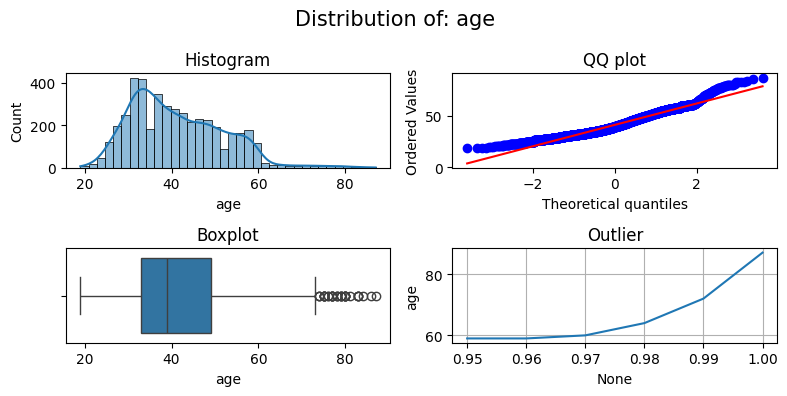

In [25]:
summary_numerical_dist(df, 'age', .95, 1)


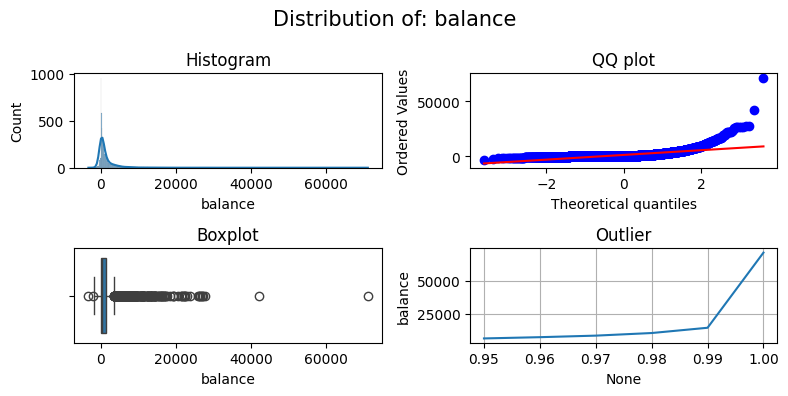

In [26]:
summary_numerical_dist(df, 'balance', .95, 1)

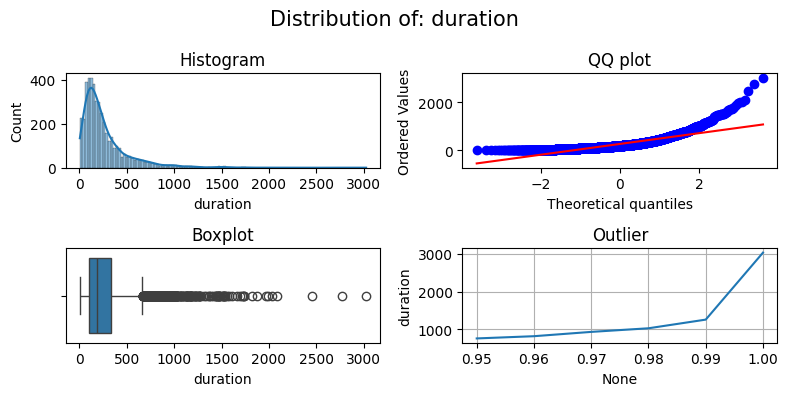

In [27]:
summary_numerical_dist(df, 'duration', .95, 1)

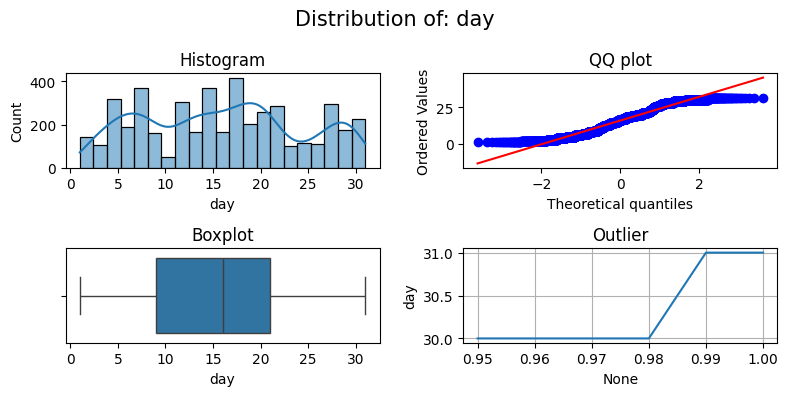

In [28]:
summary_numerical_dist(df, 'day', .95, 1)

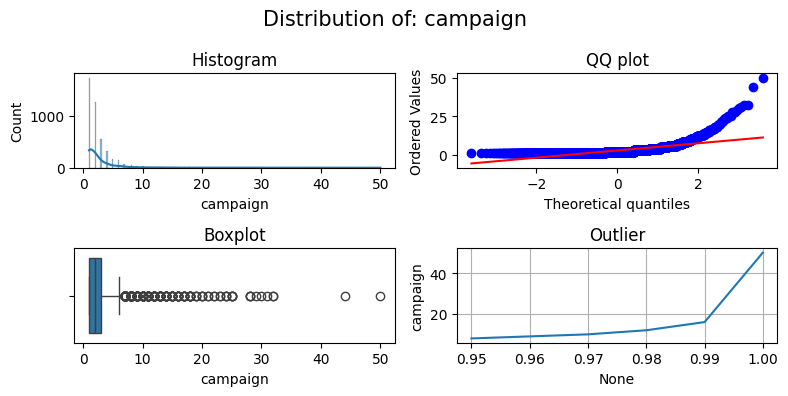

In [29]:
summary_numerical_dist(df, 'campaign', .95, 1)

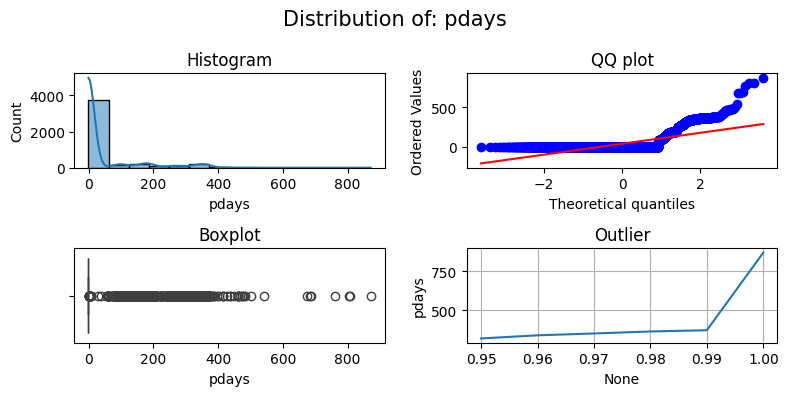

In [30]:
summary_numerical_dist(df, 'pdays', .95, 1)

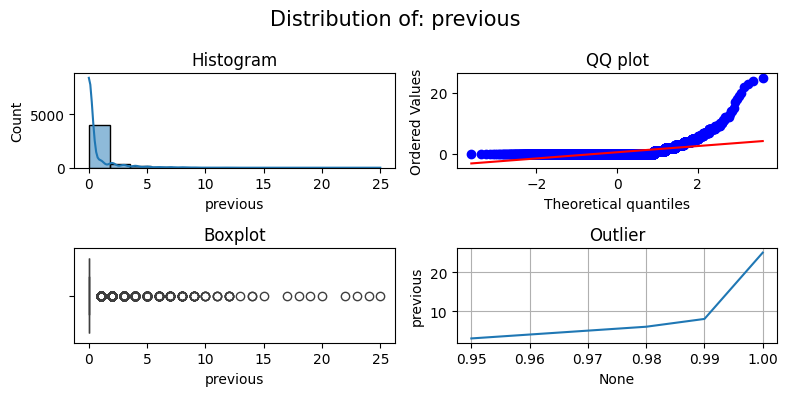

In [31]:
summary_numerical_dist(df, 'previous', .95, 1)

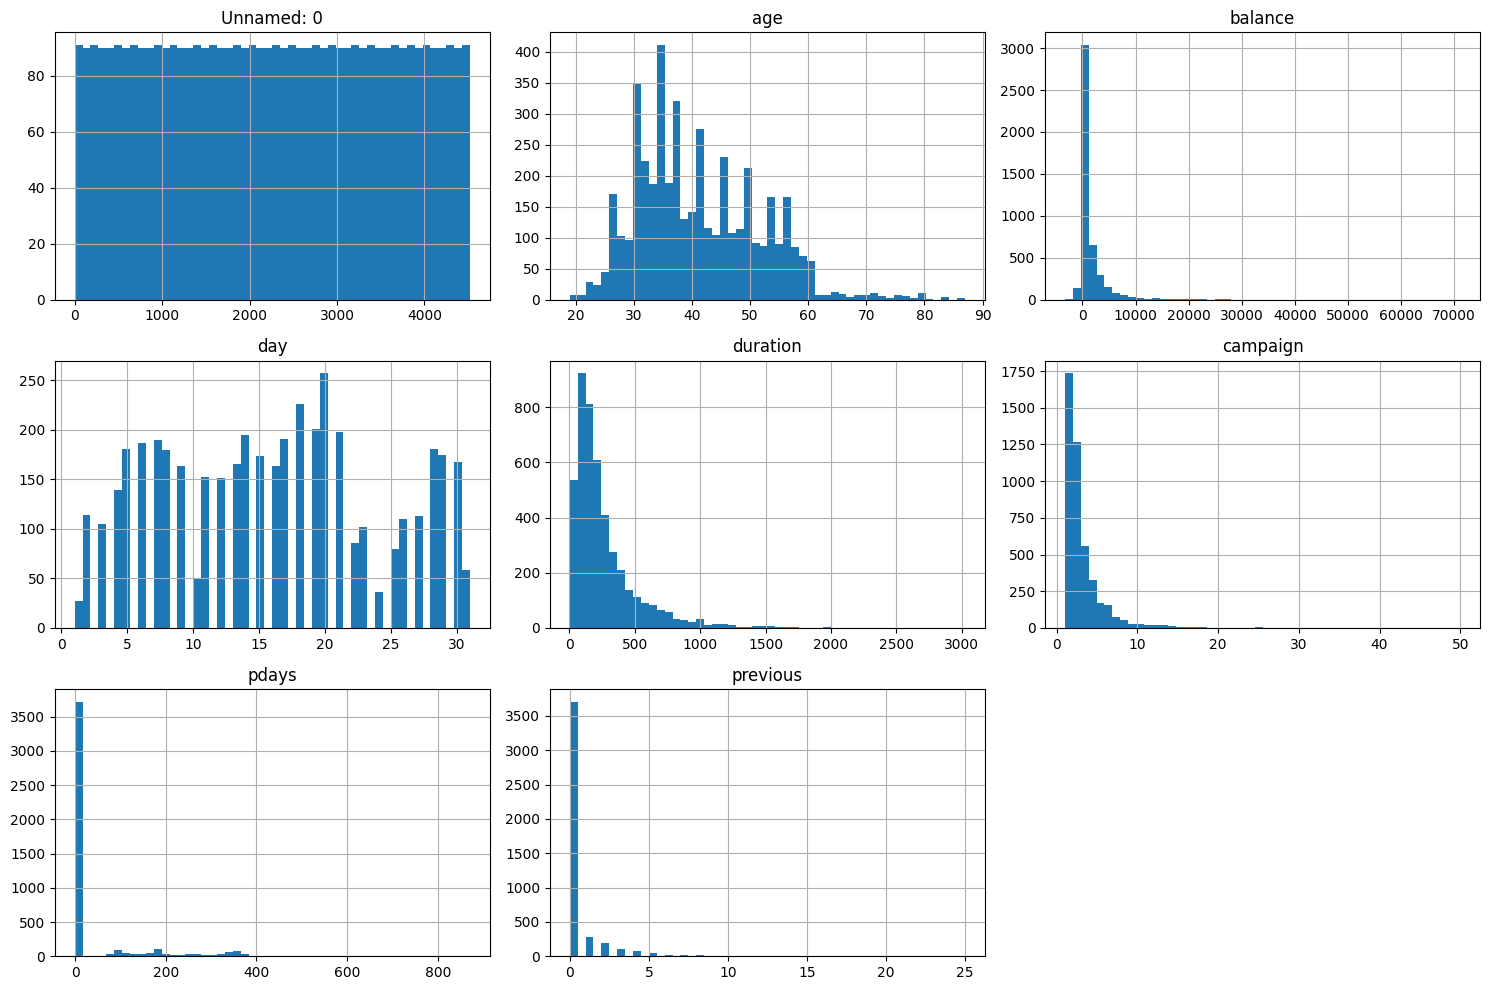

In [44]:
# plotting histograms for all numerical features
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(15,10))
plt.tight_layout()
plt.show()

In [53]:
# Unique values in each categorical column
for col in df.select_dtypes(include='number').columns:
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts().head(), "\n")


Unnamed: 0: 4521 unique values
Unnamed: 0
4520    1
0       1
1       1
2       1
3       1
Name: count, dtype: int64 

age: 67 unique values
age
34    231
32    224
31    199
36    188
33    186
Name: count, dtype: int64 

balance: 2353 unique values
balance
0     357
2      24
1      15
4      13
23     11
Name: count, dtype: int64 

day: 31 unique values
day
20    257
18    226
19    201
21    198
14    195
Name: count, dtype: int64 

duration: 875 unique values
duration
123    27
104    25
119    23
106    22
77     22
Name: count, dtype: int64 

campaign: 32 unique values
campaign
1    1734
2    1264
3     558
4     325
5     167
Name: count, dtype: int64 

pdays: 292 unique values
pdays
-1      3705
 182      23
 183      20
 363      12
 92       12
Name: count, dtype: int64 

previous: 24 unique values
previous
0    3705
1     286
2     193
3     113
4      78
Name: count, dtype: int64 



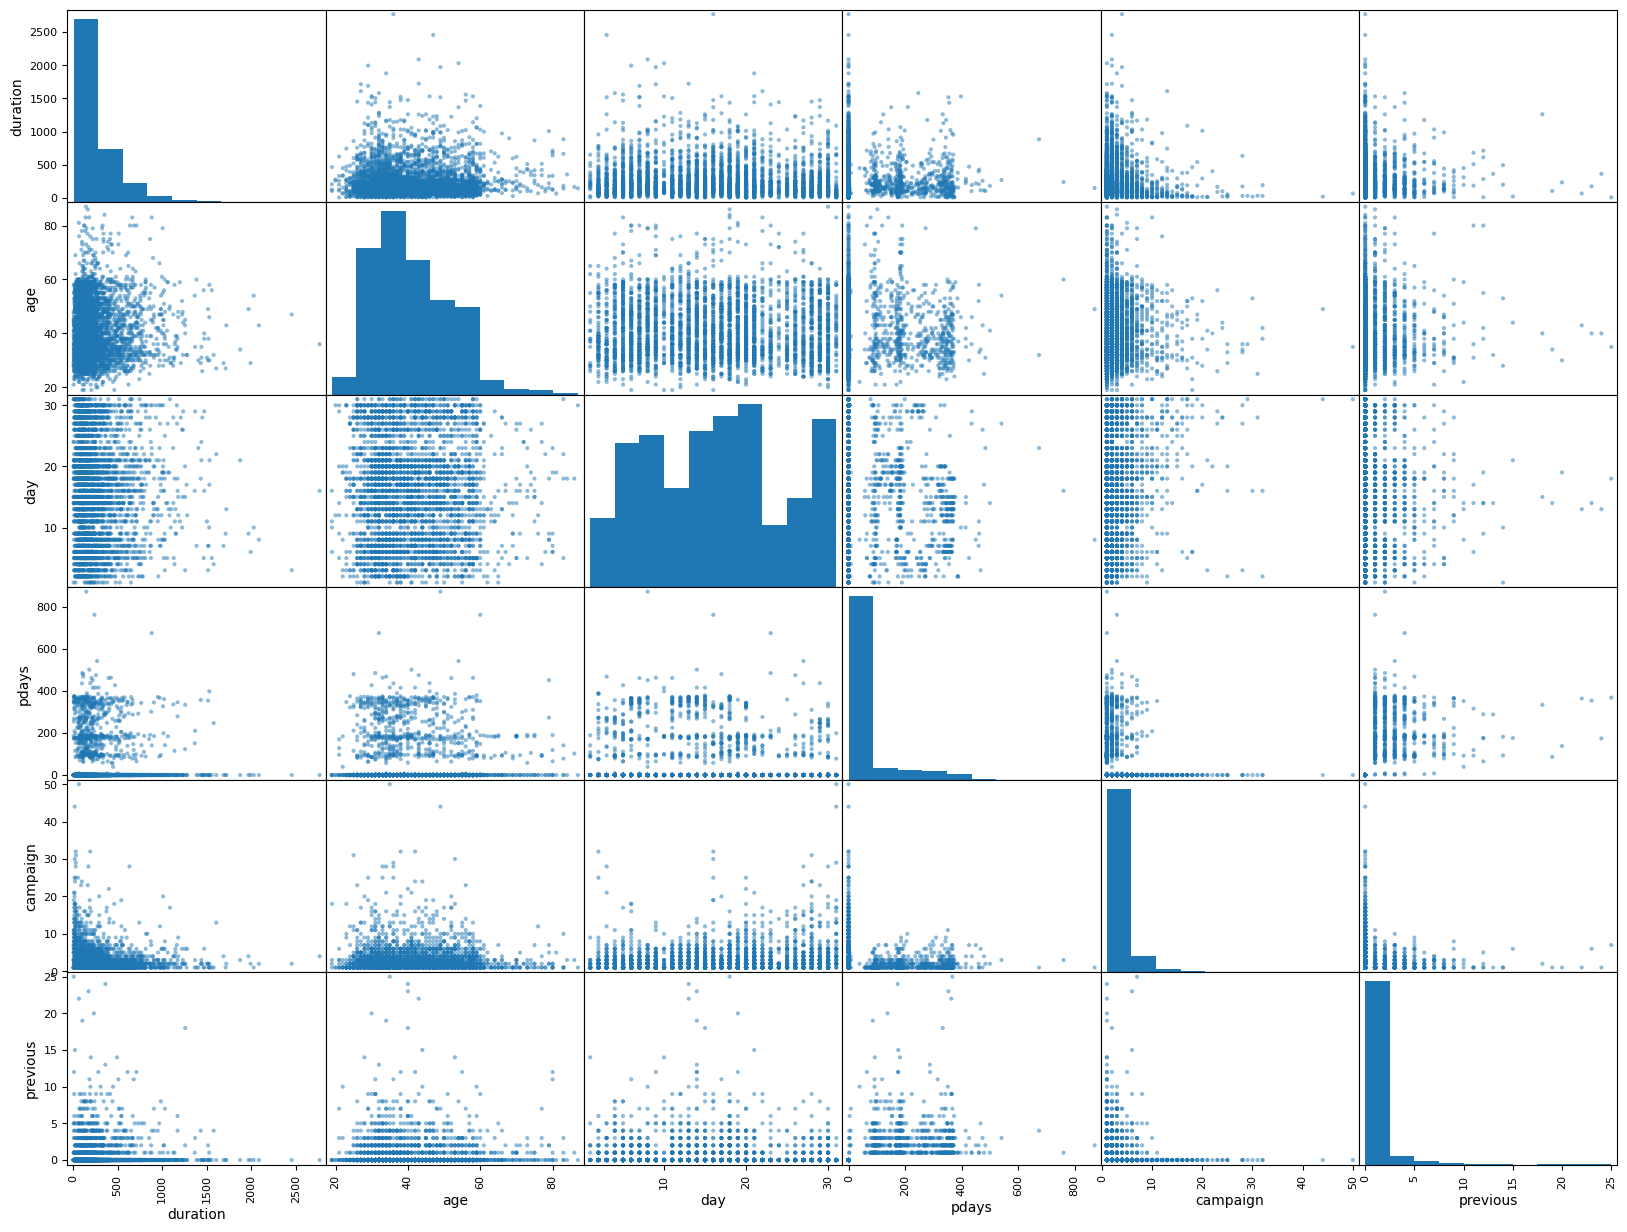

In [54]:
from pandas.plotting import scatter_matrix
attributes = [
    'duration', 'age', 'day', 'pdays',
    'campaign', 'previous',
]

scatter_matrix(df_train[attributes], figsize=(20, 15))
plt.show()

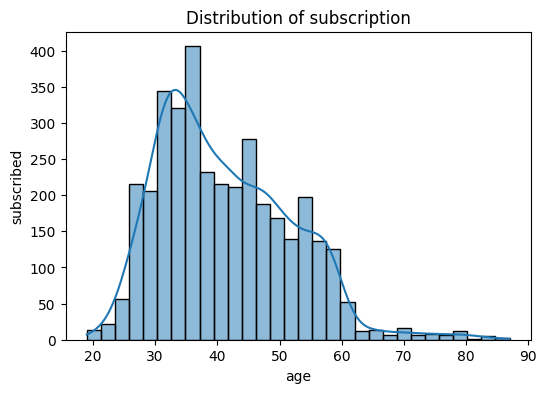

In [55]:
plt.figure(figsize=(6,4))
sns.histplot(df_train['age'], bins=30, kde=True)
plt.title('Distribution of subscription')
plt.xlabel('age')
plt.ylabel('subscribed')
plt.show()

Categorical

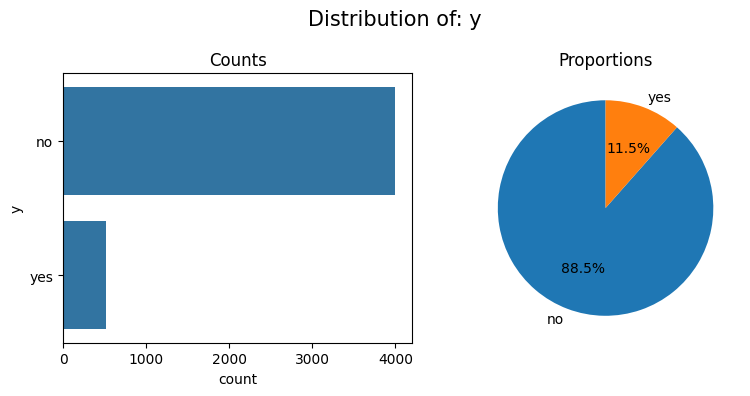

In [32]:
summary_categorical_dist(df, 'y')

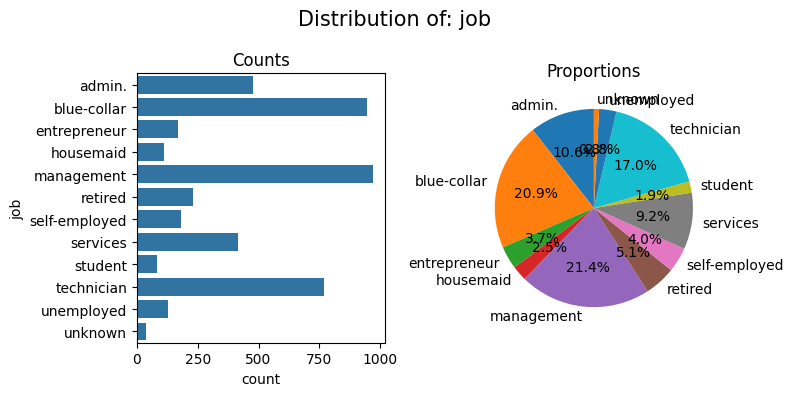

In [33]:
summary_categorical_dist(df, 'job')

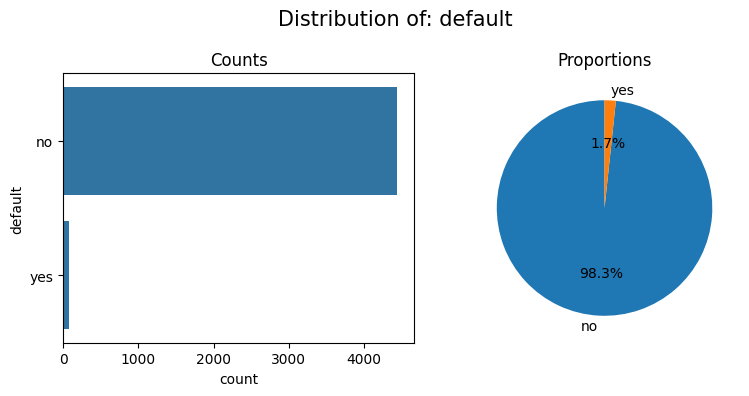

In [38]:
summary_categorical_dist(df, 'default')

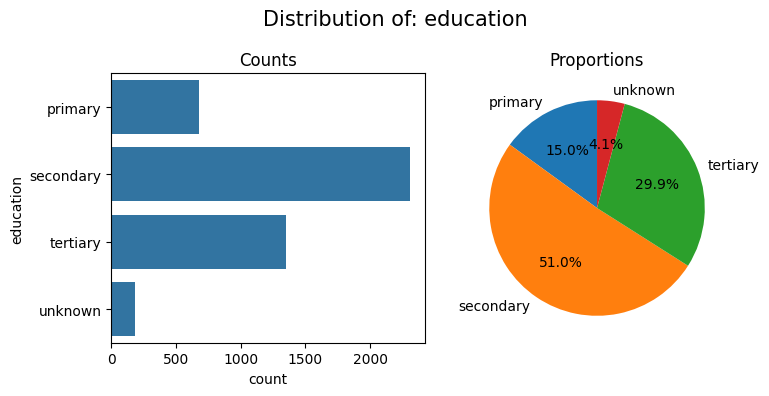

In [34]:
summary_categorical_dist(df, 'education')

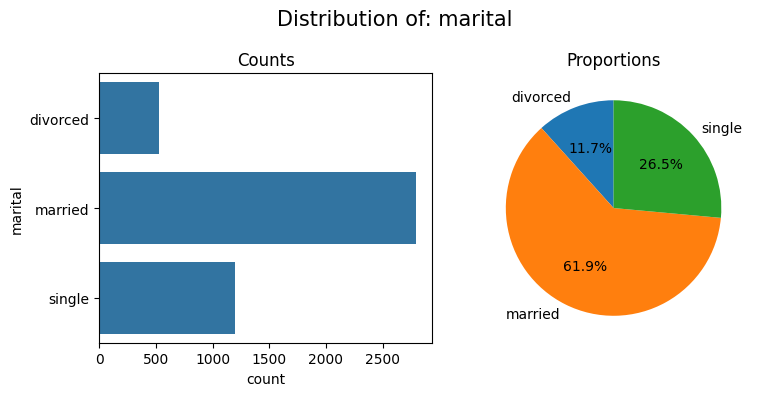

In [35]:
summary_categorical_dist(df,'marital')

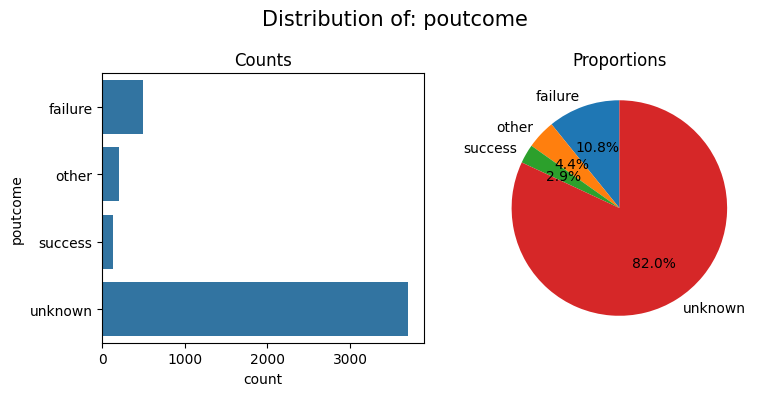

In [36]:
summary_categorical_dist(df, 'poutcome')

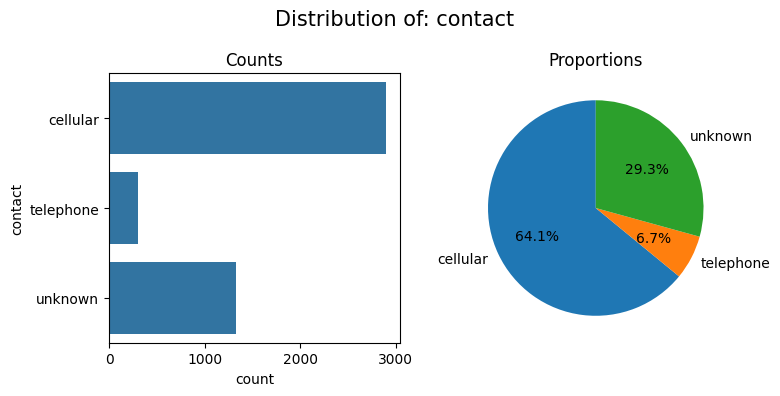

In [39]:
summary_categorical_dist(df, 'contact')

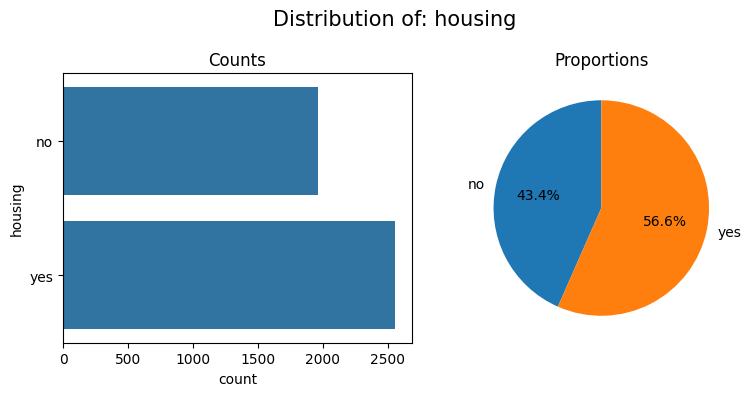

In [40]:
summary_categorical_dist(df, 'housing')

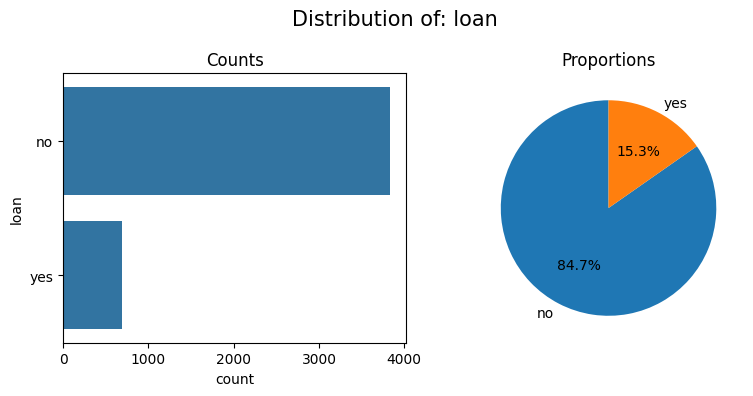

In [41]:
summary_categorical_dist(df, 'loan')

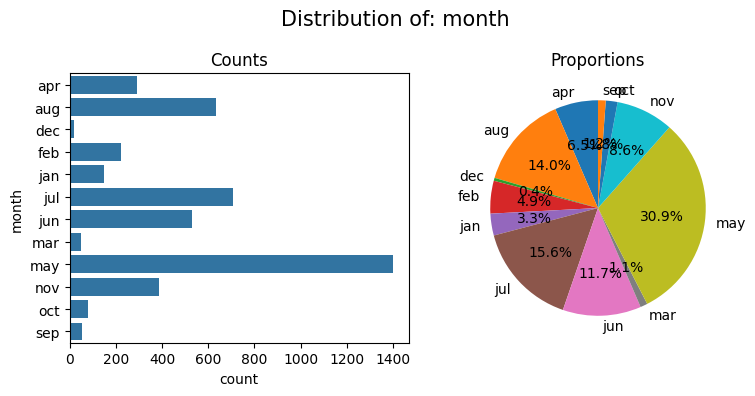

In [42]:
summary_categorical_dist(df,'month')

In [49]:
# Unique values in each categorical column
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts().head(), "\n")


job: 12 unique values
job
management     969
blue-collar    946
technician     768
admin.         478
services       417
Name: count, dtype: int64 

marital: 3 unique values
marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64 

education: 4 unique values
education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64 

default: 2 unique values
default
no     4445
yes      76
Name: count, dtype: int64 

housing: 2 unique values
housing
yes    2559
no     1962
Name: count, dtype: int64 

loan: 2 unique values
loan
no     3830
yes     691
Name: count, dtype: int64 

contact: 3 unique values
contact
cellular     2896
unknown      1324
telephone     301
Name: count, dtype: int64 

month: 12 unique values
month
may    1398
jul     706
aug     633
jun     531
nov     389
Name: count, dtype: int64 

poutcome: 4 unique values
poutcome
unknown    3705
failure     490
other       197
success     129
Name: count, dtype: i

Feature Engineering

In [73]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
print(f"Train set: {train_set.shape}, Test set: {test_set.shape}")


Train set: (3616, 32), Test set: (905, 32)


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nShapes of the resulting datasets:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



Shapes of the resulting datasets:
X_train shape: (3616, 31)
X_test shape: (905, 31)
y_train shape: (3616,)
y_test shape: (905,)


In [75]:
df_train = train_set.copy()

In [76]:
print(f"The shape of the train set is {train_set.shape} and the shape of the test set is {test_set.shape}")

The shape of the train set is (3616, 32) and the shape of the test set is (905, 32)


In [56]:
df['was_previously_contacted'] = df['pdays'].apply(lambda x: 0 if x == -1 else 1)
df = pd.get_dummies(df, columns=['poutcome'], drop_first=True)
df = pd.get_dummies(df, columns=['contact'], drop_first=True)
df = pd.get_dummies(df, columns=['month'], drop_first=True)
df = pd.get_dummies(df, columns=['education'], drop_first=True)
df = df.drop('pdays', axis=1)
df = df.drop('Unnamed: 0', axis=1)

display(df.head())

,age,job,marital,default,balance,housing,loan,day,duration,campaign,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,education_secondary,education_tertiary,education_unknown
0,30,unemployed,married,no,1787,no,no,19,79,1,...,False,False,False,False,False,True,False,False,False,False
1,33,services,married,no,4789,yes,yes,11,220,1,...,False,False,False,True,False,False,False,True,False,False
2,35,management,single,no,1350,yes,no,16,185,1,...,False,False,False,False,False,False,False,False,True,False
3,30,management,married,no,1476,yes,yes,3,199,4,...,False,True,False,False,False,False,False,False,True,False
4,59,blue-collar,married,no,0,yes,no,5,226,1,...,False,False,False,True,False,False,False,True,False,False


In [58]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [59]:
y = df['y']
X = df.drop('y', axis=1)

In [60]:
y = y.apply(lambda x: 1 if x == 'yes' else 0)

In [64]:
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(exclude=np.number).columns.tolist()
print("Remaining categorical features:", categorical_features)
print("Numerical features:", numerical_features)



Remaining categorical features: ['job', 'marital', 'default', 'housing', 'loan', 'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'education_secondary', 'education_tertiary', 'education_unknown']
Numerical features: ['age', 'balance', 'day', 'duration', 'campaign', 'previous', 'was_previously_contacted']


In [66]:
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])
print(X.head())


        age          job  marital default   balance housing loan       day  \
0 -1.056270   unemployed  married      no  0.121072      no   no  0.374052   
1 -0.772583     services  married      no  1.118644     yes  yes -0.596026   
2 -0.583458   management   single      no -0.024144     yes   no  0.010273   
3 -1.056270   management  married      no  0.017726     yes  yes -1.566105   
4  1.686036  blue-collar  married      no -0.472753     yes   no -1.323585   

   duration  campaign  ...  month_jul  month_jun  month_mar  month_may  \
0 -0.711861 -0.576829  ...      False      False      False      False   
1 -0.169194 -0.576829  ...      False      False      False       True   
2 -0.303898 -0.576829  ...      False      False      False      False   
3 -0.250017  0.387967  ...      False       True      False      False   
4 -0.146102 -0.576829  ...      False      False      False       True   

   month_nov  month_oct  month_sep  education_secondary  education_tertiary  \
0      

In [78]:
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

In [79]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore') 


In [ ]:
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features_to_encode = ['job', 'marital', 'default', 'housing', 'loan']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features_to_encode)])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)




In [84]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


print("Shapes of the resulting processed datasets:")
print("X_train_processed shape:", X_train_processed.shape)
print("X_test_processed shape:", X_test_processed.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Shapes of the resulting processed datasets:
X_train_processed shape: (3616, 28)
X_test_processed shape: (905, 28)
y_train shape: (3616,)
y_test shape: (905,)


In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [86]:
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train_processed, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [87]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_processed, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [88]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_processed, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [89]:
print("Logistic Regression, Random Forest, and Decision Tree models have been trained successfully.")

Logistic Regression, Random Forest, and Decision Tree models have been trained successfully.


Evaluating the Models

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score



In [91]:
log_reg_pred = log_reg_model.predict(X_test_processed)
log_reg_pred_proba = log_reg_model.predict_proba(X_test_processed)[:, 1] 

log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
log_reg_precision = precision_score(y_test, log_reg_pred)
log_reg_recall = recall_score(y_test, log_reg_pred)
log_reg_f1 = f1_score(y_test, log_reg_pred)
log_reg_roc_auc = roc_auc_score(y_test, log_reg_pred_proba)

print("Logistic Regression Model Performance:")
print(f"Accuracy: {log_reg_accuracy:.4f}")
print(f"Precision: {log_reg_precision:.4f}")
print(f"Recall: {log_reg_recall:.4f}")
print(f"F1-score: {log_reg_f1:.4f}")
print(f"ROC AUC: {log_reg_roc_auc:.4f}")
print("-" * 30)

Logistic Regression Model Performance:
Accuracy: 0.8873
Precision: 0.5250
Recall: 0.2019
F1-score: 0.2917
ROC AUC: 0.8425
------------------------------


In [ ]:
rf_pred = rf_model.predict(X_test_processed)
rf_pred_proba = rf_model.predict_proba(X_test_processed)[:, 1] # Get probability of the positive class

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred) 
rf_f1 = f1_score(y_test, rf_pred)
rf_roc_auc = roc_auc_score(y_test, rf_pred_proba)

print("Random Forest Model Performance:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-score: {rf_f1:.4f}")
print(f"ROC AUC: {rf_roc_auc:.4f}")
print("-" * 30)

Random Forest Model Performance:
Accuracy: 0.8851
Precision: 0.5000
Recall: 0.1923
F1-score: 0.2778
ROC AUC: 0.8429
------------------------------


In [ ]:
dt_pred = dt_model.predict(X_test_processed)
dt_pred_proba = dt_model.predict_proba(X_test_processed)[:, 1] # Get probability of the positive class

dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)
dt_roc_auc = roc_auc_score(y_test, dt_pred_proba)

print("Decision Tree Model Performance:")
print(f"Accuracy: {dt_accuracy:.4f}")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall: {dt_recall:.4f}")
print(f"F1-score: {dt_f1:.4f}")
print(f"ROC AUC: {dt_roc_auc:.4f}")

Decision Tree Model Performance:
Accuracy: 0.8508
Precision: 0.3495
Recall: 0.3462
F1-score: 0.3478
ROC AUC: 0.6313


In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [99]:
# Define the parameter grid for Logistic Regression
log_reg_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'] # 'liblinear' supports both 'l1' and 'l2' penalties
}

# Define the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

print("Parameter grids defined successfully.")

Parameter grids defined successfully.


Evaluate Performance of Logistic Regression

In [ ]:
#Instantiate Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Instantiate GridSearchCV for Logistic Regression
log_reg_grid_search = GridSearchCV(estimator=log_reg, param_grid=log_reg_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit GridSearchCV to the training data
log_reg_grid_search.fit(X_train_processed, y_train)

# Print the best parameters and best score
print("Best parameters for Logistic Regression:")
print(log_reg_grid_search.best_params_)
print("\nBest cross-validation ROC AUC score for Logistic Regression:")
print(log_reg_grid_search.best_score_)

Best parameters for Logistic Regression:
{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

Best cross-validation ROC AUC score for Logistic Regression:
0.8671189815291795


In [102]:
best_log_reg_model = log_reg_grid_search.best_estimator_


log_reg_tuned_pred = best_log_reg_model.predict(X_test_processed)


log_reg_tuned_pred_proba = best_log_reg_model.predict_proba(X_test_processed)[:, 1]

# Evaluate the tuned Logistic Regression model
log_reg_tuned_accuracy = accuracy_score(y_test, log_reg_tuned_pred)
log_reg_tuned_precision = precision_score(y_test, log_reg_tuned_pred)
log_reg_tuned_recall = recall_score(y_test, log_reg_tuned_pred)
log_reg_tuned_f1 = f1_score(y_test, log_reg_tuned_pred)
log_reg_tuned_roc_auc = roc_auc_score(y_test, log_reg_tuned_pred_proba)

print("Tuned Logistic Regression Model Performance on Test Set:")
print(f"Accuracy: {log_reg_tuned_accuracy:.4f}")
print(f"Precision: {log_reg_tuned_precision:.4f}")
print(f"Recall: {log_reg_tuned_recall:.4f}")
print(f"F1-score: {log_reg_tuned_f1:.4f}")
print(f"ROC AUC: {log_reg_tuned_roc_auc:.4f}")

Tuned Logistic Regression Model Performance on Test Set:
Accuracy: 0.8873
Precision: 0.5263
Recall: 0.1923
F1-score: 0.2817
ROC AUC: 0.8437


Evaluate and Fine tune Parameters for Random Forest

In [103]:
rf = RandomForestClassifier(random_state=42)

# Instantiate GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit GridSearchCV to the training data
rf_grid_search.fit(X_train_processed, y_train)

# Print the best parameters and best score
print("Best parameters for Random Forest:")
print(rf_grid_search.best_params_)
print("\nBest cross-validation ROC AUC score for Random Forest:")
print(rf_grid_search.best_score_)

Best parameters for Random Forest:
{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}

Best cross-validation ROC AUC score for Random Forest:
0.8719055661080495


In [104]:
# Get the best estimator
best_rf_model = rf_grid_search.best_estimator_

# Make predictions on the test data
rf_tuned_pred = best_rf_model.predict(X_test_processed)

# Calculate predicted probabilities
rf_tuned_pred_proba = best_rf_model.predict_proba(X_test_processed)[:, 1]

# Evaluate the tuned Random Forest model
rf_tuned_accuracy = accuracy_score(y_test, rf_tuned_pred)
rf_tuned_precision = precision_score(y_test, rf_tuned_pred)
rf_tuned_recall = recall_score(y_test, rf_tuned_pred)
rf_tuned_f1 = f1_score(y_test, rf_tuned_pred)
rf_tuned_roc_auc = roc_auc_score(y_test, rf_tuned_pred_proba)

print("Tuned Random Forest Model Performance on Test Set:")
print(f"Accuracy: {rf_tuned_accuracy:.4f}")
print(f"Precision: {rf_tuned_precision:.4f}")
print(f"Recall: {rf_tuned_recall:.4f}")
print(f"F1-score: {rf_tuned_f1:.4f}")
print(f"ROC AUC: {rf_tuned_roc_auc:.4f}")

Tuned Random Forest Model Performance on Test Set:
Accuracy: 0.8873
Precision: 0.5357
Recall: 0.1442
F1-score: 0.2273
ROC AUC: 0.8519


In [105]:
# Create a DataFrame to store the performance metrics
performance_comparison = pd.DataFrame({
    'Model': ['Logistic Regression (Original)', 'Logistic Regression (Tuned)',
              'Random Forest (Original)', 'Random Forest (Tuned)'],
    'Accuracy': [log_reg_accuracy, log_reg_tuned_accuracy, rf_accuracy, rf_tuned_accuracy],
    'Precision': [log_reg_precision, log_reg_tuned_precision, rf_precision, rf_tuned_precision],
    'Recall': [log_reg_recall, log_reg_tuned_recall, rf_recall, rf_tuned_recall],
    'F1-score': [log_reg_f1, log_reg_tuned_f1, rf_f1, rf_tuned_f1],
    'ROC AUC': [log_reg_roc_auc, log_reg_tuned_roc_auc, rf_roc_auc, rf_tuned_roc_auc]
})

# Display the comparison DataFrame
display(performance_comparison)

,Model,Accuracy,Precision,Recall,F1-score,ROC AUC
0,Logistic Regression (Original),0.887293,0.525000,0.201923,0.291667,0.842541
1,Logistic Regression (Tuned),0.887293,0.526316,0.192308,0.281690,0.843717
2,Random Forest (Original),0.885083,0.500000,0.192308,0.277778,0.842883
3,Random Forest (Tuned),0.887293,0.535714,0.144231,0.227273,0.851868


In [111]:
import pickle
import os
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Example trained models (replace with your actual trained models)
logistic_model = LogisticRegression()
rf_model = RandomForestClassifier()

# Dictionary of models
models = {
    "logistic_regression": log_reg_model,
    "random_forest": rf_model
}

# Ensure folder exists
os.makedirs("../model", exist_ok=True)

# Save each model
for name, model in models.items():
    filename = f"../model/{name}.pkl"
    with open(filename, "wb") as f:  # wb = write in binary mode
        pickle.dump(model, f)
    print(f"✅ Saved {name} model to {filename}")


✅ Saved logistic_regression model to ../model/logistic_regression.pkl
✅ Saved random_forest model to ../model/random_forest.pkl


In [112]:
# Load Logistic Regression model
with open("../model/logistic_regression.pkl", "rb") as f:
    loaded_logistic_model = pickle.load(f)
print("✅ Logistic Regression model loaded!")

# Load Random Forest model
with open("../model/random_forest.pkl", "rb") as f:
    loaded_rf_model = pickle.load(f)
print("✅ Random Forest model loaded!")


✅ Logistic Regression model loaded!
✅ Random Forest model loaded!
